<a href="https://colab.research.google.com/github/nikhilkalghatgi/learning/blob/main/Classification_bcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data.data.shape


(569, 30)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33
)

In [ ]:
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
r = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100
)

Epoch 1/100
12/12 [==============================] - 1s 59ms/step - loss: 186.9276 - accuracy: 0.3517 - val_loss: 160.0102 - val_accuracy: 0.4149
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 177.1885 - accuracy: 0.3517 - val_loss: 151.0590 - val_accuracy: 0.4149
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 167.1317 - accuracy: 0.3517 - val_loss: 142.2868 - val_accuracy: 0.4149
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 157.2295 - accuracy: 0.3517 - val_loss: 133.4901 - val_accuracy: 0.4149
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 147.1328 - accuracy: 0.3517 - val_loss: 124.8098 - val_accuracy: 0.4149
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 137.3517 - accuracy: 0.3517 - val_loss: 116.0126 - val_accuracy: 0.4149
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 127.3651 - accuracy: 0.3517 - val_loss: 107.2565 - val_a

In [ ]:
print("Train score ", model.evaluate(X_train, y_train))
print("Tetst score ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.8714
Train score  [0.5827987790107727, 0.8713910579681396]
6/6 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9309
Tetst score  [0.26314401626586914, 0.9308510422706604]


In [ ]:
import matplotlib.pyplot as plt

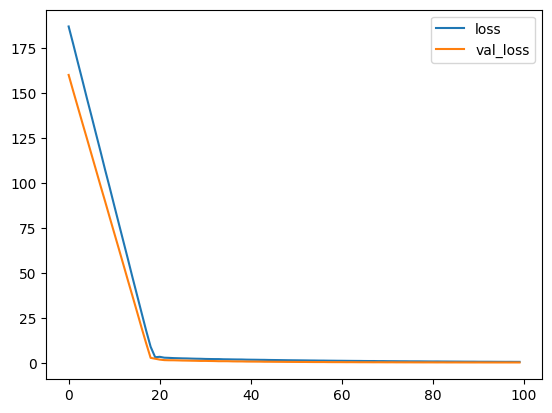

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()